## 1. Clustering

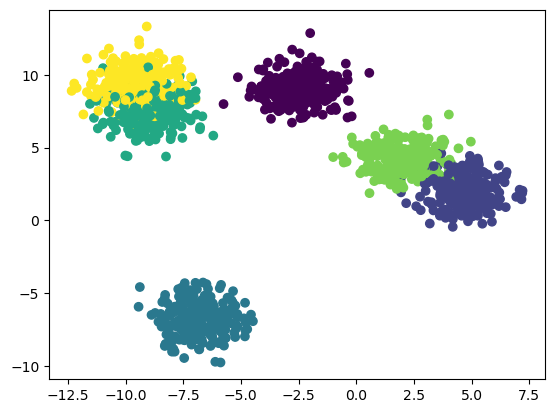

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
n_samples = 1500
std = 1
n_clusters = 6
X,y, centers = make_blobs(n_samples=n_samples, cluster_std = 1,centers = n_clusters, return_centers=True)

plt.scatter(X[:,0],X[:,1],c=y)

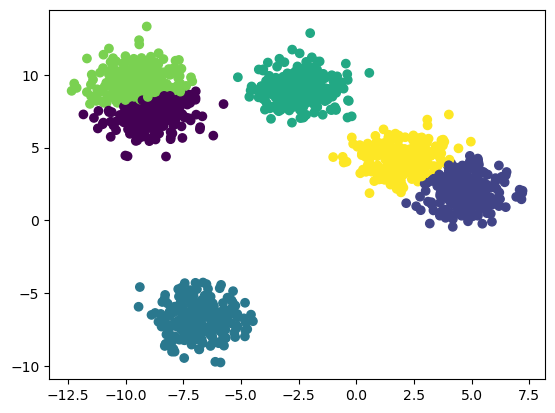

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=n_clusters)

y_pred = km.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred)

In [4]:
centers[centers[:, 0].argsort()]

array([[-9.58831011,  9.39819704],
       [-8.83832776,  7.32352292],
       [-6.87962719, -6.88010959],
       [-2.50919762,  9.01428613],
       [ 2.02230023,  4.16145156],
       [ 4.63987884,  1.97316968]])

In [5]:
km.cluster_centers_[km.cluster_centers_[:,0].argsort()]

array([[-9.5326037 ,  9.49359457],
       [-8.84755791,  7.2088668 ],
       [-6.74623019, -6.81223703],
       [-2.51046006,  9.02632355],
       [ 1.96089766,  4.21724424],
       [ 4.71394132,  2.00294719]])

In [6]:
km.inertia_

2699.864708057415

### Try out other routines

- AffinityPropogation() and DBSCAN()

## 2. Principal Component Analysis

In [7]:
def get_cov(sdx=1, sdy=1, rotangdeg=0):
    covar = np.array([[sdx**2,0],[0,sdy**2]]) # Scaling factors
    rot_ang = rotangdeg / 360 * 2 * np.pi # Convert degree to radians
    c, s = np.cos(rot_ang), np.sin(rot_ang)
    rot_mat = np.array([[c, -s], [s, c]])
    #
    print(rot_mat)
    
    covar = np.matmul(np.matmul(rot_mat,covar),rot_mat.T) 
    return covar


[[ 0.92050485 -0.39073113]
 [ 0.39073113  0.92050485]]


(-1.0, 1.0)

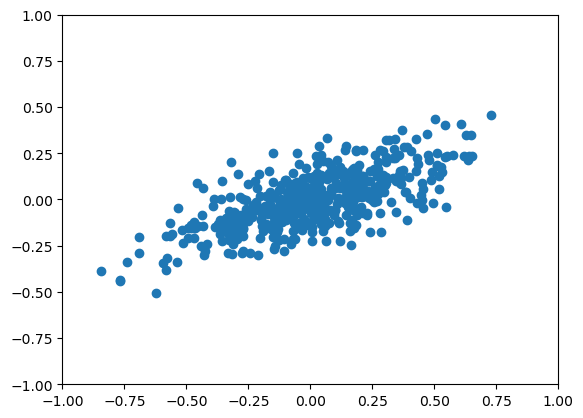

In [9]:
std_x = 0.3
std_y = 0.1
rot_degree = 23
cov = get_cov(std_x,std_y,rot_degree)

my_normal = np.random.multivariate_normal(mean=[0,0],cov=cov,size=500)

X = my_normal[:,0]
y = my_normal[:,1]

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(my_normal)

pca.components_

array([[-0.91449168, -0.4046047 ],
       [-0.4046047 ,  0.91449168]])

In [11]:
comp_1 = np.array([ np.zeros(2), pca.components_[:,0]] )
comp_2 = np.array([ np.zeros(2), pca.components_[:,1]] )
comp_1

array([[ 0.        ,  0.        ],
       [-0.91449168, -0.4046047 ]])

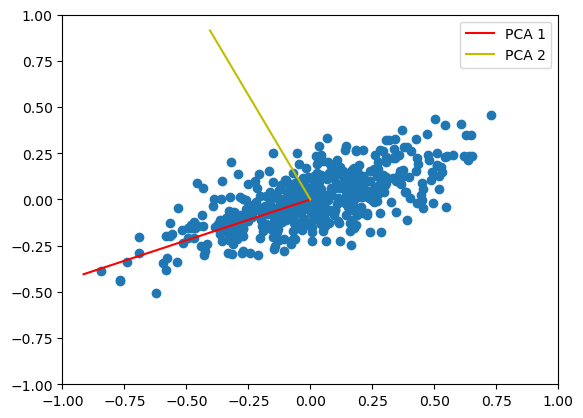

In [12]:
fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.plot(comp_1[:,0],comp_1[:,1],c='r', label="PCA 1")
ax.plot(comp_2[:,0],comp_2[:,1], c='y', label= "PCA 2")
ax.legend()

In [13]:
# Angle of first PCA
angle_pca_1 = np.arctan(comp_1[1,1]/comp_1[1,0]) / np.pi*180
angle_pca_1

23.866357866388295

In [15]:
# error of pca degree
error = (np.abs(angle_pca_1) - np.abs(rot_degree) )/np.abs(rot_degree)*100
'Error is {:.2f}%'.format(error)

'Error is 3.77%'

In [16]:
# Angle of second PCA
np.arctan(comp_2[1,1]/comp_2[1,0]) / np.pi*180

-66.13364213361172

- Think of two improvements to improve this PCA degree estimate so its closer to 23
   - Perhaps eliminating some outlier data
      - Will try later
 
   - Reduce std
      - If i reduce one of the dimension's std it sorta works